In [1]:
# Diabetes Predictor - Clean & Commented Full Pipeline
# Goal: Predict whether a patient is likely to have diabetes using selected health features
# Type: Binary Classification
# Models Used: Logistic Regression and Decision Tree
# Real-life Application: Healthcare Analytics

In [3]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [9]:
# Step 2: Load the Dataset

df = pd.read_csv("diabetes_prediction_ - diabetes_prediction_impure.csv.csv")  # Make sure the CSV file is in the same folder or provide full path

In [15]:
# Step 3: Identify Invalid Data — Some medical values like Glucose, BMI etc. have 0s
# These should not be 0 — we'll treat 0s in these features as missing values
features_with_zeros = ['Glucose', 'BloodPressure', 'Diabetic', 'BMI']
print("\nCount of 0s in important features (treated as missing):")
print((df[features_with_zeros] == 0).sum())


Count of 0s in important features (treated as missing):
Glucose           0
BloodPressure     0
Diabetic         90
BMI               0
dtype: int64


In [17]:
# Step 4: Replace 0s with NaN to make them easy to handle
df[features_with_zeros] = df[features_with_zeros].replace(0, np.nan)


In [19]:
# Step 5: Count missing (NaN) values
print("\nMissing values after replacing 0s with NaN:")
print(df[features_with_zeros].isnull().sum())



Missing values after replacing 0s with NaN:
Glucose           17
BloodPressure     20
Diabetic         110
BMI               19
dtype: int64


In [21]:
# Step 6: Fill missing values using the median of each feature
# Median is robust and works well for healthcare data
for col in features_with_zeros:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)


In [23]:
# Step 7: Final check — Any NaN values left?
print("\nMissing values after cleaning (should be 0):")
print(df.isnull().sum())


Missing values after cleaning (should be 0):
Age              19
BMI               0
Glucose           0
BloodPressure     0
FamilyHistory     0
Diabetic          0
dtype: int64


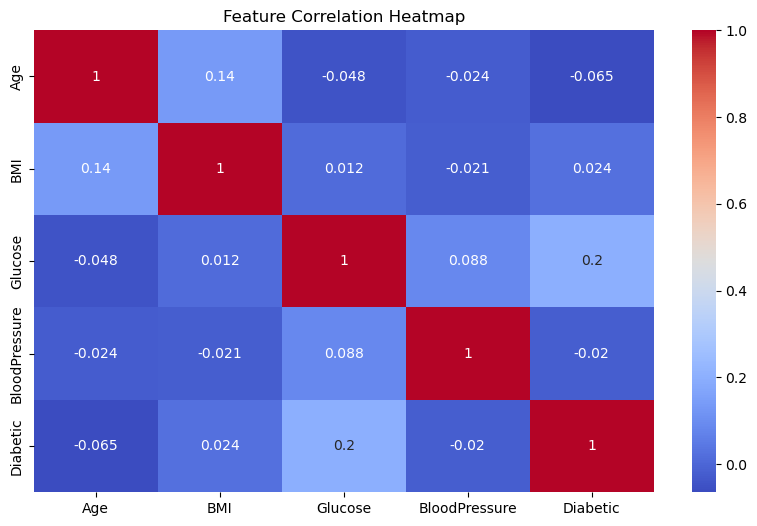

In [27]:
# Step 8: Correlation heatmap (for analytics)
# Helps identify which features relate most to Outcome
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [61]:
# Step 9: Select Features & Target for ML Task
# Features chosen: Age, BMI, Glucose, BloodPressure, and DiabetesPedigreeFunction
# These are key indicators for diabetes risk
features = ['Age', 'BMI', 'Glucose', 'BloodPressure']  # Family history proxy
X = df[features]
y = df['Diabetic']  # Target variable: 0 (No diabetes) / 1 (Diabetes)

In [63]:
# Step 10: Split data into training and testing
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
# Step 11: Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values